In [1]:
from nistats.second_level_model import SecondLevelModel
import os
import glob as glob
import matplotlib.pyplot as plt
#$%matplotlib inline

import pandas as pd
import numpy as np

import nibabel as nib
from nilearn import image, plotting
from nistats.design_matrix import make_first_level_design_matrix
from nistats.reporting import plot_design_matrix,  plot_contrast_matrix
from nistats.first_level_model import FirstLevelModel
from nilearn.plotting import plot_stat_map, plot_anat, plot_img


/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
#--- settings
rdms_dir = f'/home/finc/1stlevel_surveyMedley/'  #'/oak/stanford/groups/russpold/data/uh2/BIDS_data/derivatives/surveyMedley/1stlevel_surveyMedley/'
n_rois = 400

subs_list = np.sort(os.listdir(rdms_dir))
subs_list = [i for i in subs_list if len(i) == 8]

Step 1: Loading z-maps
-----------------------------

In [3]:
all_zmaps = np.zeros((67, 89, 105, 89))

for i, sub in enumerate(subs_list):
    path = f'{rdms_dir}{sub}/{sub}_surveyMedley_Q_overal_zmap.nii.gz'
    if not os.path.exists(path):
        continue
        
    else:
        zmap = nib.load(path)
        all_zmaps[i, :, :, :] = zmap.get_fdata()

Step 2: Calculating mean z-map
-----------------------------

/home/finc/anaconda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


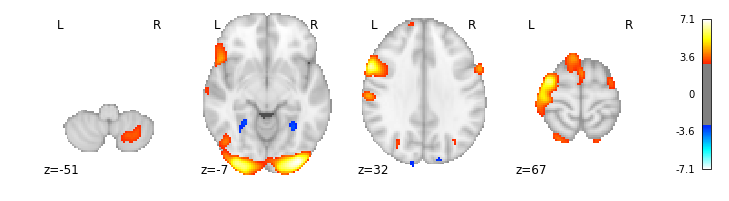

In [6]:
mean_all_zmaps = all_zmaps.mean(axis=0)

zmap_img = nib.Nifti1Image(mean_all_zmaps, zmap.affine, zmap.header)

plot_stat_map(zmap_img, threshold=3,
              display_mode='z', cut_coords=4, black_bg=False)

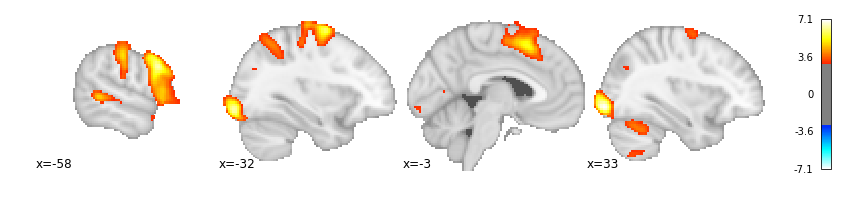

In [7]:
p = plot_stat_map(zmap_img, threshold=3,
                  display_mode='x', cut_coords=4, black_bg=False)


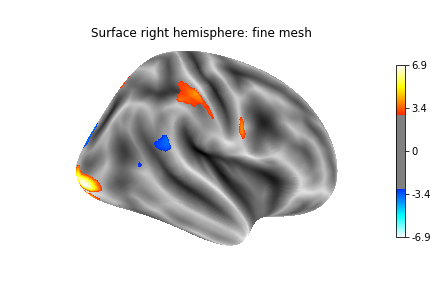

In [33]:
from nilearn import datasets
from nilearn import surface

fsaverage = datasets.fetch_surf_fsaverage()
texture = surface.vol_to_surf(zmap_img, fsaverage.pial_right)


big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
big_texture = surface.vol_to_surf(zmap_img, big_fsaverage.pial_right)

plotting.plot_surf_stat_map(big_fsaverage.infl_right,
                            big_texture, hemi='right', colorbar=True,
                            title='Surface right hemisphere: fine mesh',
                            threshold=3, bg_map=big_fsaverage.sulc_right)


plotting.show()

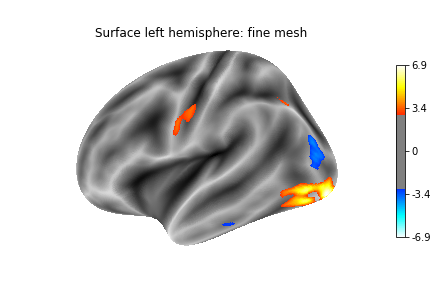

In [36]:
plotting.plot_surf_stat_map(big_fsaverage.infl_left,
                            big_texture, hemi='left', colorbar=True,
                            title='Surface left hemisphere: fine mesh',
                            threshold=3, bg_map=big_fsaverage.sulc_left)


plotting.show()